# Season 9 Election Notes

>**FORBIDDEN KNOWLEDGE WARNING**
>
>This document contains some information that is not currently present on the main site and may be considered spoilers.
>Continue at your own discretion. Some information in this document cannot be shared on the Discord without spoiler tags.

Last updated Season ??, Day ??

In [76]:
%matplotlib inline
import matplotlib.pyplot as plot
from display import *
from blessings import *

pies = Team.load_by_name("Philly Pies")

---
# Decrees


All Decrees are “Forecast: X” where X is a pre-existing weather. Each weather has a small chance for specific effects on
the game, for reference:
* Solar Eclipses cause Incinerations.
* Peanuts cause yummy/allergic peanut reactions (±20% to all stats) as well as giant falling peanuts that can shell
  players mid-game.
* Birds cause batters to occasionally ~~get out in the middle of their at-bat~~ (removed due to bugs), and is the only
  known way to break Shelled players free.
* Feedback causes players to swap teams.
* Reverb can either shuffle the lineup, rotation, or whole team order. It can also cause a player to become
  Reverberating, which permanently gives them a chance to bat twice in a row.
* Blooddrain causes players to drain a specific stat (10%) from a player on the other team.

3 Decrees will pass at the end of the election. It is unknown how these decrees will affect the weather, but it is
believed that the 3 chosen weathers will be the only weathers available for the next season.

Birds is an obvious benefit for us due to our Affinity for Crows (50% better batting/pitching for the Pies) and is
generally supported by teams that need to break players out of shells. Teams tend to dislike Feedback and Solar Eclipses
as it can kill or trade players they like. Strategically, Peanuts is the worst as it causes a player to lose on average
1 star in each category OR completely remove them from games until they are unshelled.

In [77]:
# Number of times certain weather occurred last season
games = Game.load_by_season(season=8)
weathers = pandas.Series([x.weather.text for x in games.values()])
table = pandas.DataFrame(weathers.value_counts(), columns=["weather_count"])
table["weather_percent"] = (table["weather_count"]/len(games))*100
table

,weather_count,weather_percent
Feedback,408,40.157480
Blooddrain,199,19.586614
Birds,188,18.503937
Peanuts,112,11.023622
Reverb,56,5.511811
Solar Eclipse,53,5.216535


___
# Blessings

## Eat me, Drink me
**A random player on your team becomes BIG. Increased Power, Max Vibe. Decreased Baserunning.**

Random. This is identical to the Mushroom without being an item. Power is a combination of `musclitude` and `divinity`
which would increase triples & home runs.

In [78]:
# Possible change in Pies players
eat_and_drink, _, _= make_team_big_pandas(pies)
eat_and_drink

,old_batting_stars,old_baserunning_stars,new_batting_stars,new_baserunning_stars,change_in_batting_stars,change_in_baserunning_stars
Eduardo Woodman,4.165300,3.519368,5.276781,1.490168,1.111481,-2.029199
Beasley Day,2.695709,2.470609,3.948781,0.173211,1.253072,-2.297399
Farrell Seagull,2.030782,2.708760,3.748635,0.592069,1.717854,-2.116691
Jaxon Buckley,5.579461,3.263785,6.903130,1.092542,1.323668,-2.171244
Lang Richardson,2.914378,3.241335,4.356126,0.876060,1.441748,-2.365274
Yusef Puddles,2.147811,2.817447,3.738244,0.645564,1.590433,-2.171884
Jode Preston,4.238300,3.687356,5.266336,1.397140,1.028036,-2.290216


## Credit to the Team
**The worst player on your team will earn 5x payouts for Idol Pendants.**

The current worst player on the team is below. Having a player be the target of idol board shenanigans has gone poorly
in the past (see York Silk in a peanut).

In [79]:
get_stars(sort_overall(pies, 1, order="worst"))

,Batting,Pitching,Baserunning,Defense
Bright Zimmerman,3.5,1.5,1.0,3.0


## Secret Weapon
**Maximize a random Pitcher in your Shadows.**

Random. The pitcher Shadows is the bullpen, a list of which can be found below. Just maximizing a player is somewhat
useless unless we also get a blessing to add them to our rotation.

In [80]:
# Bullpen Stars
get_stars(pies.bullpen)

,Batting,Pitching,Baserunning,Defense
Castillo Logan,2.0,3.0,2.5,3.0
Bambi Perez,1.5,0.5,2.5,3.0
Jesús Rodriguez,1.5,1.5,2.5,1.5
Jefferson Delacruz,3.0,0.5,3.5,4.0
Case Lancaster,0.0,3.5,2.0,3.0
Haruta Byrd,3.5,2.5,2.5,1.5
Javier Lotus,3.5,1.0,3.5,4.0
Tiana Takahashi,1.0,3.0,2.5,3.0


In [81]:
# Bullpen pitching stlats
table = get_pitching_stlats(pies.bullpen)
set_heatmap(table, maxVal=1)

,Unthwackability,Ruthlessness,Overpowerment,Shakespearianism,Coldness,Suppression
Castillo Logan,0.962056,0.679044,0.166984,0.994242,0.090067,0.230832
Bambi Perez,0.018422,0.478632,0.274202,0.151506,0.582147,0.110881
Jesús Rodriguez,0.191237,0.679646,0.284989,0.186662,0.391038,0.808921
Jefferson Delacruz,0.205741,0.185705,0.386775,0.004881,0.683663,0.097056
Case Lancaster,0.867044,0.829197,0.190119,0.825333,0.868251,0.082117
Haruta Byrd,0.746009,0.684712,0.189109,0.602043,0.755252,0.360515
Javier Lotus,0.107195,0.270303,0.270723,0.798413,0.489265,0.621886
Tiana Takahashi,0.910065,0.961592,0.716677,0.028954,0.596122,0.945940


## Grab and Smash
**Steal a Hitter from another Team's Shadows.**

The hitter Shadows is the bench. This would likely replace our worst batter, found below. Below is a graph of all the
possible batters in division opponent benches, sorted by number of stars. Previous seasons have selected a random team,
then taken the best player from those Shadows, but that’s a sample size of 1 so it’s hard to tell if it was just luck.

In [82]:
# Will replace this Pies player:
get_stars(sort_lineup(pies, 1, order="worst"))

,Batting,Pitching,Baserunning,Defense
Farrell Seagull,2.0,2.0,2.5,1.5


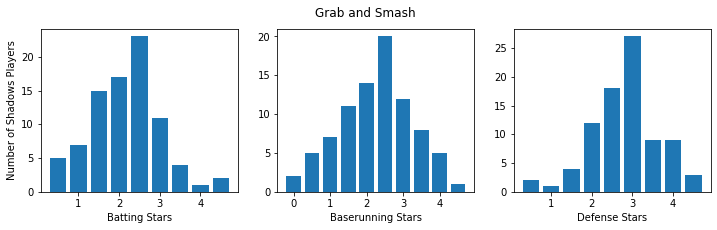

In [83]:
gs_bat, gs_base, gs_def = grab_and_smash(pies)

# Plot star changes
fig, axs = plot.subplots(1, 3, figsize=(12,3))
axs[0].bar(gs_bat.index, gs_bat["Total"], width=0.4)
axs[0].set_xlabel("Batting Stars")
axs[0].set_ylabel("Number of Shadows Players")
axs[1].bar(gs_base.index, gs_base["Total"], width=0.4)
axs[1].set_xlabel("Baserunning Stars")
axs[2].bar(gs_def.index, gs_def["Total"], width=0.4)
axs[2].set_xlabel("Defense Stars")
fig.suptitle("Grab and Smash")
plot.show()

## Out of Sight
**Send your 2 Worst Pitchers to the Shadows and call up your First 2 Relievers.**

See below for comparison between existing pitchers and their replacements.

In [84]:
OOS_old = sort_rotation(pies, 2)
OOS_new = pies.bullpen[0:2]

In [85]:
# Star Comparison
table = get_stars(OOS_old + OOS_new)
set_heatmap(table, maxVal=5)

,Batting,Pitching,Baserunning,Defense
Bright Zimmerman,3.500000,1.500000,1.000000,3.000000
Henry Marshallow,2.000000,2.000000,1.500000,3.500000
Castillo Logan,2.000000,3.000000,2.500000,3.000000
Bambi Perez,1.500000,0.500000,2.500000,3.000000


In [86]:
# Pitching Stlat Comparison
table = get_pitching_stlats(OOS_old + OOS_new)
set_heatmap(table, maxVal=1)

,Unthwackability,Ruthlessness,Overpowerment,Shakespearianism,Coldness,Suppression
Bright Zimmerman,0.207882,0.511157,0.852666,0.679224,0.303950,0.870961
Henry Marshallow,0.233266,0.882016,1.123135,0.484581,0.571587,0.656728
Castillo Logan,0.962056,0.679044,0.166984,0.994242,0.090067,0.230832
Bambi Perez,0.018422,0.478632,0.274202,0.151506,0.582147,0.110881


## Disappearing Acts
**Send your Worst 3 Hitters to the Shadows and call up the first 3 Shadows Hitters.**

See below for comparison between existing batters and their replacements.

In [87]:
DA_old = sort_lineup(pies, 3)
DA_new = pies.bench[0:3]

In [88]:
# Star Comparison
table = get_stars(DA_old + DA_new)
set_heatmap(table, maxVal=5)

,Batting,Pitching,Baserunning,Defense
Farrell Seagull,2.000000,2.000000,2.500000,1.500000
Yusef Puddles,2.000000,2.500000,3.000000,3.500000
Beasley Day,2.500000,1.500000,2.500000,1.500000
Adrian Melon,2.500000,1.000000,3.000000,2.500000
August Obrien,3.500000,1.000000,3.500000,2.000000
Mcfarland Vargas,1.500000,1.500000,4.000000,2.000000


In [89]:
# Batting Stlat Comparison
table = get_batting_stlats(DA_old + DA_new)
set_heatmap(table, maxVal=1)

,Thwackability,Divinity,Musclitude,Moxie,Patheticism,Martyrdom,Tragicness,Buoyancy
Farrell Seagull,0.623806,0.235514,0.069620,0.768254,0.126134,0.860282,0.036873,0.542776
Yusef Puddles,1.033698,0.184577,0.675196,0.151908,0.630778,0.110821,0.057271,1.010015
Beasley Day,0.685000,0.688801,0.077669,0.208479,0.468964,0.523706,0.100000,0.753672
Adrian Melon,0.302171,0.708122,0.951649,0.102259,0.275678,0.332170,0.100000,0.543764
August Obrien,0.641217,0.927569,0.913891,0.492708,0.923854,0.556849,0.100000,0.463958
Mcfarland Vargas,0.117084,0.776150,0.307714,0.175366,0.984279,0.417832,0.100000,0.551343


## Feel the Love
**Give your Team Love Blood Type.**

Currently Love Blood does not have an in-game impact. It will probably gain a gameplay mechanic once the blessing is
passed, but this is currently unknown.

## Hot Sauce Bar
**Help yourselves. A player on each team in your Division gets Spicy.**

Spicy gives a player improved batting if they get 3 hits in a row, which lasts until they get out at-bat again
(strikeout, fly or ground out). Pies batting is strong but not generally known for consistency.

## Fifth Base Bubble
**Give all of the teams not in your Division the Fifth Base.**

Exact impact unknown. A Fifth base is generally bad for teams that have weak baserunning and hitting.

## The Shame Bubble
**Give all of the teams not in your Division Targeted Shame.**

We had this in Season 8, not sure how much of an impact it made for us specifically.

## Tag Team Pitching
**Improve your team's pitching by 10%. The last place team in the opposite subleague also gets +10% team pitching.**

See below for analysis.

In [90]:
# Pies Improvement
table, total, avg = improve_team_pitching_pandas(pies, 0.10)
print("Change in Total stars: " + str(total["change_in_pitching_stars"]))
print("Change in Average stars: " + str(avg["change_in_pitching_stars"]))
table

Change in Total stars: 2.9647092884055164
Change in Average stars: 0.5929418576811033


,old_pitching_stars,new_pitching_stars,change_in_pitching_stars
Bright Zimmerman,1.589235,2.156695,0.567459
Henry Marshallow,2.143457,2.771380,0.627923
Ruslan Greatness,2.425975,2.974996,0.549020
Nicholas Mora,2.832423,3.452093,0.619670
Elvis Figueroa,4.748317,5.348954,0.600637


In [91]:
# Opponent Improvement+
tacos = Team.load_by_name("Tacos")
table, total, avg = improve_team_pitching_pandas(tacos, 0.10)
print("Change in Total stars: " + str(total["change_in_pitching_stars"]))
print("Change in Average stars: " + str(avg["change_in_pitching_stars"]))
table

Change in Total stars: 1.0774164428102577
Change in Average stars: 0.5387082214051289


,old_pitching_stars,new_pitching_stars,change_in_pitching_stars
Sexton Wheerer,2.482981,3.022747,0.539766
Peanut Bong,0.949309,1.486960,0.537650


## Tag Team Hitting
**Improve your team's hitting by 10%. The last place team in the opposite subleague also gets +10% team hitting.**

See below for analysis.

In [92]:
# Pies Improvement
table, total, avg = improve_team_batting_pandas(pies, 0.10)
print("Change in Total stars: " + str(total["change_in_batting_stars"]))
print("Change in Average stars: " + str(avg["change_in_batting_stars"]))
table

Change in Total stars: 3.7414256749426693
Change in Average stars: 0.534489382134667


,old_batting_stars,new_batting_stars,change_in_batting_stars
Farrell Seagull,2.030782,2.633148,0.602366
Yusef Puddles,2.147811,2.778538,0.630727
Beasley Day,2.695709,3.291428,0.595719
Lang Richardson,2.914378,3.423157,0.508779
Eduardo Woodman,4.165300,4.648604,0.483305
Jode Preston,4.238300,4.721003,0.482703
Jaxon Buckley,5.579461,6.017289,0.437827


In [93]:
# Opponent Improvement
tacos = Team.load_by_name("Tacos")
table, total, avg = improve_team_batting_pandas(tacos, 0.10)
print("Change in Total stars: " + str(total["change_in_batting_stars"]))
print("Change in Average stars: " + str(avg["change_in_batting_stars"]))
table

Change in Total stars: 3.396467525833686
Change in Average stars: 0.4852096465476694


,old_batting_stars,new_batting_stars,change_in_batting_stars
Halexandrey Walton,4.405156,4.856318,0.451161
Mcdowell Mason,4.197657,4.681830,0.484173
Valentine Games,5.477524,5.928246,0.450722
Rat Mason,3.712751,4.200101,0.487349
Basilio Mason,4.002000,4.482095,0.480095
Basilio Fig,3.139306,3.650658,0.511352
Vito Kravitz,3.566136,4.097752,0.531616


## Kill Your Darling
**Incinerate the Most Idolized Player on your Team.**

Hey.

Don’t.

## Dead Weight
**Incinerate the Worst Player on Your Team.**

See below for analysis.

In [94]:
# Would replace the following Pie
worst_player = sort_overall(pies, num=1)[0]
get_stars(worst_player)

,Batting,Pitching,Baserunning,Defense
Bright Zimmerman,3.5,1.5,1.0,3.0


In [95]:
# Calculate change in average stars if replaced by the Statistical Median new player
batting_stars = NEW_PLAYER["batting"]
pitching_stars = NEW_PLAYER["pitching"]
baserunning_stars = NEW_PLAYER["baserunning"]
defense_stars = NEW_PLAYER["defense"]
pandas.DataFrame(replace_player(pies, worst_player, batting_stars, pitching_stars, baserunning_stars, defense_stars)).transpose()

,batting_change,pitching_change,baserunning_change,defense_change
Pies,-0.160714,0.0,-0.071429,-0.041667


## New Kid
**Incinerate the Least Idolized Player on your Team.**

Cannot currently know who the least-idolized player on the team is. With correct organization could be used as a
controlled incineration for one of our bad players.

## Boatload of Tiny Eggs
**Fans of your team receive a big barrel of peanuts.**

Peanuts would be used for the Hall of Flame ratings. Amount of peanuts in a “boatload” is unknown; last season’s
blessing was 10K.

## New Recruit
**Recruit a rookie to be an extra player in your lineup.**

This would cause the existing players to bat less, which means we would need to get a reroll of over our team average
to not lose total team stars. See below for analysis.

In [96]:
# Calculate change in average stars if replaced by the Statistical Median new player
batting_stars = NEW_PLAYER["batting"]
baserunning_stars = NEW_PLAYER["baserunning"]
defense_stars = NEW_PLAYER["defense"]
pandas.DataFrame(add_player(pies, batting_stars, baserunning_stars, defense_stars)).transpose()

,batting_change,baserunning_change,defense_change
Pies,-0.160714,-0.071429,-0.038462


## Downsizing
**Remove the worst player from your lineup. Your lineup is now shorter.**

See below for analysis.

In [97]:
# Would replace the following Pie
worst_lineup = sort_lineup(pies, num=1)[0]
get_stars(worst_lineup)

,Batting,Pitching,Baserunning,Defense
Farrell Seagull,2.0,2.0,2.5,1.5


In [98]:
# Change in team average stars
pandas.DataFrame(remove_player(pies, worst_lineup)).transpose()

,batting_change,baserunning_change,defense_change
Pies,0.214286,0.095238,0.136364


## Fishing Net
**Item. Max Out Defense for a random player on your team.**

Random. Overall Pies defense is decent and improving it for one player will likely not be a large change.

## Mutually Arising
**Improve your entire division by 2%**

See below for comparison of average stars per team.

In [99]:
# Compute team average stars
mild_low = Division.load_by_name("Mild Low")
mutual_arise = pandas.DataFrame()
for team in mild_low.teams.values():
    _, _, average = improve_team_overall_pandas(team, 0.02)
    average = average.rename(team.nickname)
    mutual_arise = mutual_arise.append(average)
mutual_arise.transpose()

,Fridays,Moist Talkers,Shoe Thieves,Magic,Breath Mints
change_in_baserunning_stars,0.103051,0.098871,0.110711,0.123203,0.125298
change_in_batting_stars,0.103051,0.098871,0.110711,0.123203,0.125298
change_in_defense_stars,0.131723,0.102474,0.182104,0.126009,0.131336
change_in_pitching_stars,0.119798,0.123980,0.128335,0.123330,0.118703
new_baserunning_stars,3.136521,2.939038,2.612638,3.310630,3.222779
new_batting_stars,3.202425,3.815682,3.216632,2.771662,3.277532
new_defense_stars,3.851479,3.127065,2.960478,3.122423,3.286014
new_pitching_stars,3.799613,3.320568,2.869091,2.904666,3.243161
old_baserunning_stars,3.029080,2.817704,2.499368,3.193127,3.108839
old_batting_stars,3.099375,3.716810,3.105921,2.648459,3.152234


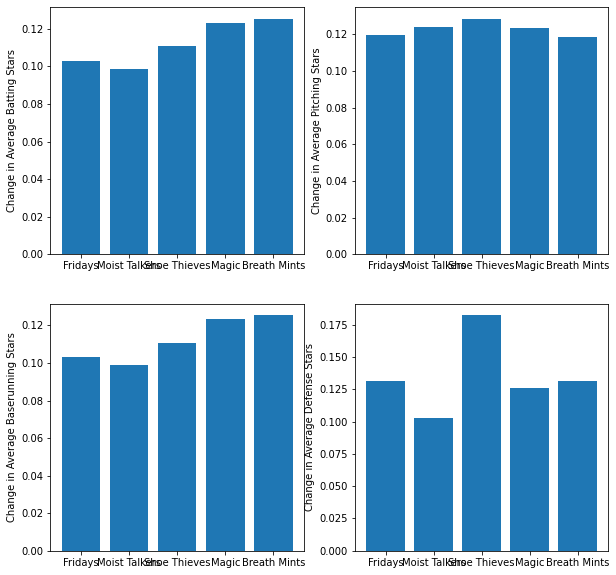

In [100]:
fig, axs = plot.subplots(2, 2, figsize=(10,10))
axs[0][0].bar(mutual_arise.index, mutual_arise["change_in_batting_stars"])
axs[0][0].set_ylabel("Change in Average Batting Stars")
axs[0][1].bar(mutual_arise.index, mutual_arise["change_in_pitching_stars"])
axs[0][1].set_ylabel("Change in Average Pitching Stars")
axs[1][0].bar(mutual_arise.index, mutual_arise["change_in_baserunning_stars"])
axs[1][0].set_ylabel("Change in Average Baserunning Stars")
axs[1][1].bar(mutual_arise.index, mutual_arise["change_in_defense_stars"])
axs[1][1].set_ylabel("Change in Average Defense Stars")
plot.show()

---
# Appendix
* [Description of Attributes](https://www.blaseball.wiki/w/FK:Player_Attributes)
* [Source code for this document](https://github.com/Edgarware/blaseball_notebooks)
* [Stlat Viewer](https://slavfox.space/abslve/?foreboding-kaleidoscope#PHIL)
* [Historical Player Graphs](yoori.space/hloroscopes/)